# Computing Assignment 1

In this assignment, we will explore the creation and evaluation of sequences of random and pseudo-random numbers

## Part 1 - Exploratory analysis
On the first day of class, we generated a sequence of 144 random bits (or 18 bytes) by flipping coins.  That sequence can be found in seq1.txt, which is contained in the same directory as this notebook.  We noticed that there existed in that data, both an imbalance of 1s and 0s, as well as several perhaps surprising long strings.  Let's evaluate both of these phenomena relative to a theoretical model of the bit-generating process. 

First, is the issue of the imbalance in the mean.  **Create a method that calculates the number of 0s and 1s for an arbitrary string of bits.  Reads our observed sequence from file, and compare the observed and theoretical number.  Make an argument for whether or not you find the observed number surprising.  This argument can be as sophisticated as you want to make it (if it were me I might invoke either the theoretical variance of the binomial distribution or a combinatoric argument based on Pascal's triangle for the proportion of length-144 sequences that ought to contain 60 or fewer 1s).**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def count_bits(filename):
    with open(filename, 'r') as f:
        seq = f.read()
    n_ones = seq.count('1')
    n_zeros = seq.count('0')
    return n_zeros, n_ones

filename = 'seq1.txt'
n_zeros, n_ones = count_bits(filename)
print(f'Number of zeros: {n_zeros}')
print(f'Number of ones: {n_ones}')

def theoretical_mean(n):
    return n/2

n = n_zeros + n_ones
print(f'Theoretical mean: {theoretical_mean(n)}')

def percent_error(x, y):
    return round(abs(x-y)/x*100,3)

print(f'Percent error ones: {percent_error(theoretical_mean(n), n_ones)}%')

In [ ]:
def theoretical_std(n):
    return np.sqrt(n)/2

print(f'Theoretical std: {theoretical_std(n)}')

I do find the number of ones and zeros from our expiriment to be a bit fishy.  With a relatively large deviation from the theoretical result (11%), The probability of getting 64 ones in a 144 bit sequence is:


In [ ]:
def prob_ones_in_seq(n, k):
    return np.math.comb(n, k) * 0.5**n

prob_ones = prob_ones_in_seq(n, n_ones)
print(f'Probability of having {n_ones} ones in a sequence of {n} bits: {prob_ones}')

A probability of less than 3% is quite low.

Next, let's evaluate the issue of runs.  **Create a method that counts the number of runs of length $i$ in an arbitrary string of $n$ bits (note that you ought to do this for all possible run lengths in a single pass).  Apply this to our coin-generated string and compare the observed run counts against the theoretical expected value that we derived in class**
$$
E(T^{(i)}) = (n - i + 3) \times \left(\frac{1}{2}\right)^{i+2}.
$$
Plot both the theoretical and observed run counts as a function of $i$.  Comment on if and where the prediction and observation agree or disagree.  

In [179]:
def count_runs_observed(b_string):
    run_counts = {}
    run_length = 0
    for bit in b_string:
        if bit == '1':
            run_length += 1
        else:
            if run_length > 0:
                if run_length in run_counts:
                    run_counts[run_length] += 1
                else:
                    run_counts[run_length] = 1
                run_length = 0
    return run_counts

def read_file(filename):
    with open(filename, 'r') as f:
        seq = f.read()
    return seq

seq = read_file('seq1.txt')

run_counts = count_runs_observed(seq)
run_counts

{1: 18, 2: 8, 4: 5, 5: 2}

In [180]:
def theoretical_runs(n):
    run_counts = {}
    for i in range(1, 6):
        prob = (1/2)**(i+2)
        run_counts[i] = round(prob * (n - i + 1), 2)
    return run_counts

theoretical_run_counts = theoretical_runs(len(seq))
theoretical_run_counts

{1: 18.0, 2: 8.94, 3: 4.44, 4: 2.2, 5: 1.09}

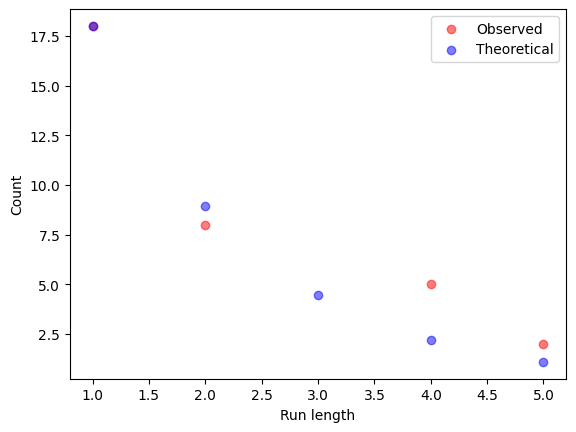

In [181]:
# plot actual runs vs theoretical runs as a function of i (run length)
plt.scatter(run_counts.keys(), run_counts.values(), label='Observed', alpha=0.5, color='red')
plt.scatter(theoretical_run_counts.keys(), theoretical_run_counts.values(), label='Theoretical', alpha=0.5, color='blue')
plt.xlabel('Run length')
plt.ylabel('Count')
plt.legend()
plt.show()

For single digit runs, our theoretical model agrees with the observed data.  After that, however, we diverge.  It is close for 2 digit runs, but not for 3 and beyond (there are actually no 3 digit runs in our observed data).  This is likely due to the fact that our observed data is not truly random, but rather generated by a human flipping a coin.

## Part 2 - Randomized trials
Ultimately our coin flip sequence is a single outcome from a rather large sample space (consider that it is unlikely that any human has ever looked at this sequence before).  To understand the empirical properties of the system, it is often necessary to look at many independent trials.  We will return to the issue of (pseudo-)random number generation shortly, but for now, in order to facilitate this multiple-trials view of understanding outcomes, I am providing you with the following function, which will provide you with a truly random string of bits of whatever length you wish.

In [7]:
import urllib.request

def get_random_bits(n_bytes=1000):
    url = f'https://www.random.org/cgi-bin/randbyte?nbytes={n_bytes}&format=b'
    data = urllib.request.urlopen(url)
    sequence = ''.join([d.decode("ascii").strip().replace(' ','') for d in data.readlines()])
    return sequence

# sequence = get_random_bits()

First, **address the question of our observed bit imbalance by producing a histogram of the proportion of 1s in a large number of length-144 sequences, with those sequences produced via the method provided previously (note that because we're querying a website, it's faster to query longer sequences and to break them in shorter chunks).  Comment on whether our coin-flip sequence is atypical.**

In [ ]:
sequence = get_random_bits(n_bytes=14400)

def chunk_sequence(sequence, chunk_size=144):
    return [sequence[i:i+chunk_size] for i in range(0, len(sequence), chunk_size)]

chunks = chunk_sequence(sequence)

def count_ones(chunk):
    return chunk.count('1')/len(chunk)

ones_proportion = [count_ones(chunk) for chunk in chunks]

plt.hist(ones_proportion, bins=30)
plt.xlabel('Proportion of ones')
plt.ylabel('Count')
plt.show()

Second, **Perform a similar analysis for the issue of runs.  I leave how you wish to visualize this to you, but one way might be to plot every random trial's run count as a function of $i$, with the transparency channel modified to be able to see density.**  Experiment with how the picture changes for longer sequences.  

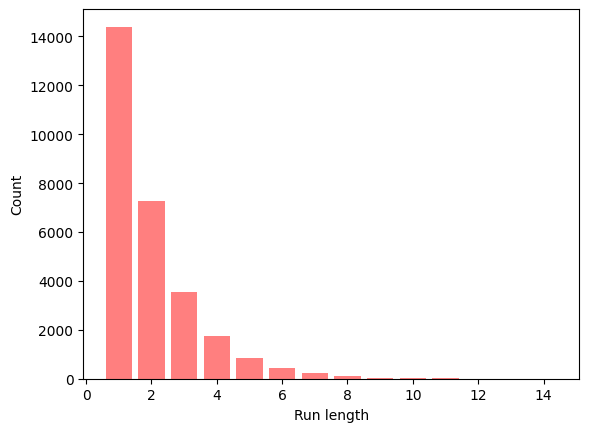

In [178]:
# TODO
# observe the distribution of runs of ones in the sequence / chunks

def count_runs_observed_chunks(chunks):
    run_counts = {}
    for chunk in chunks:
        chunk_run_counts = count_runs_observed(chunk)
        for run_length, count in chunk_run_counts.items():
            if run_length in run_counts:
                run_counts[run_length] += count
            else:
                run_counts[run_length] = count
    return run_counts

run_counts = count_runs_observed_chunks(chunks)

for i in range(1,len(run_counts.keys()) + 1):
    plt.bar(i, run_counts[i], alpha=0.5, color='red')
    plt.xlabel('Run length')
    plt.ylabel('Count')
    # log y
    # plt.yscale('log')

## Part 3 - PRNG
Querying www.random.org whenever we want random numbers is slow and unwieldy.  Instead we it would be helpful to be able to generate random numbers on our computers directly.  However, this is impossible under a deterministic model of computing (which every Turing machine is).  Instead, many pseudo-random number generators have been proposed.  Here, I would like you to implement two of them (and we will take as given a third).  

First, **implement Von Neumann's [middle square method](https://en.wikipedia.org/wiki/Middle-square_method).  It only depends on an initial seed.** Explore the generator's behavior for a few different choices of seed (both length and value).  In particular, try to list (and provide some examples of) ways in which this generator can fail.  

In [183]:
# https://en.wikipedia.org/wiki/Middle-square_method
def middle_square_method(seed_number, n=100, until_repeat = True, results=False):
    number = seed_number
    already_seen = []
    counter = 0

    if until_repeat:
        while number not in already_seen:
            counter += 1
            already_seen.append(number)
            number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
            # print(f"#{counter}: {number}")
        if results:
            return counter, already_seen
        else:
            return counter
    else:
        results = []
        for _ in range(n):
            counter += 1
            results.append(number)
            number = int(str(number * number).zfill(8)[2:6])
        return counter, results


seed_number = 123456
counter,values = middle_square_method(seed_number, results=True)
print(f"We began with {seed_number} and have repeated ourselves after {counter} steps.")
print(f"The last number generated was {values[-1]}.")

We began with 123456 and have repeated ourselves after 60 steps.
The last number generated was 2100.


In [184]:
counter,values = middle_square_method(seed_number, results=True, until_repeat=False, n=100000)

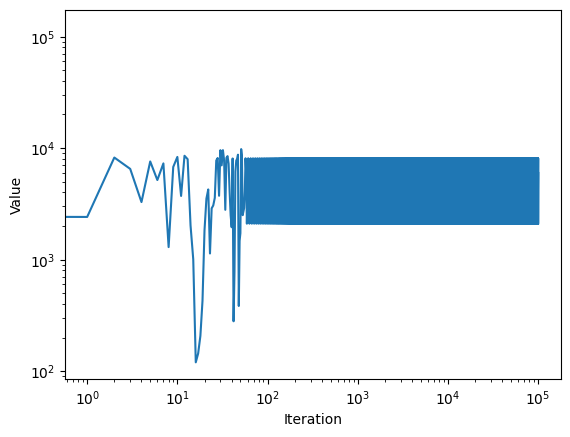

In [185]:
# plot the values generated by the middle square method
plt.plot(values)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.yscale('log')
plt.xscale('log')
plt.show()

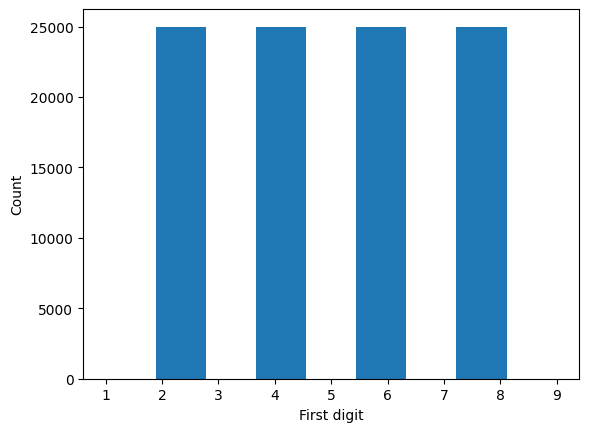

In [195]:
# plot the distribution of the first digit of each value
first_digits = [int(str(v)[0]) for v in values]
plt.hist(first_digits, bins=9)
plt.xlabel('First digit')
plt.ylabel('Count')
plt.show()

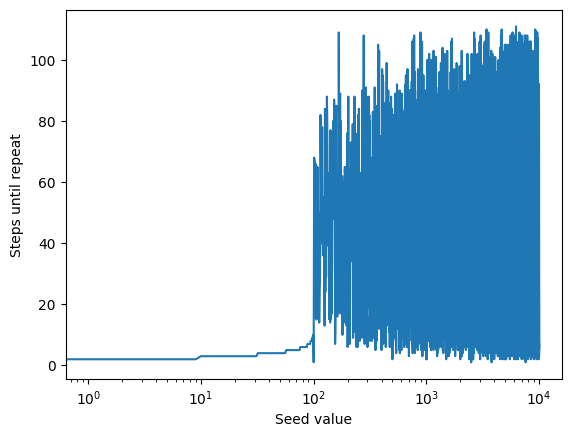

In [127]:
# plot the steps until repeat using the middle square method for four digit seed value 0000 to 9999
seed_values = range(10000)
repeats = [middle_square_method(seed) for seed in seed_values]
# log x
plt.plot(seed_values, repeats)
plt.xlabel('Seed value')
plt.ylabel('Steps until repeat')
plt.xscale('log')
plt.show()

Second, **implement a general purpose [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)**.  This method should accept a seed, as well as a modulus, multiplier, and increment.  Experiment with a few different settings for these parameters.  Demonstrate experimentally that when the modulus $m$ is a power of 2, and that the multiplier and increment are non-zero, that this generator repeats itself after $m$ numbers are generated (probably good to use a small value of $m$ for this).

In [ ]:
from collections.abc import Generator

def lcg(modulus: int, a: int, c: int, seed: int) -> Generator[int, None, None]:
    """Linear congruential generator."""
    # modulus is the maximum value of the sequence
    # a is the multiplier
    # c is the increment
    # seed is the initial value
    while True:
        seed = (a * seed + c) % modulus
        yield seed

def lcg_sequence(modulus: int, a: int, c: int, seed: int, n: int) -> np.array:
    generator = lcg(modulus, a, c, seed)
    return np.array([next(generator) for _ in range(n)])

modulus = 2**31
a = 12
c = 1
seed = 12
n = 1000

sequence = lcg_sequence(modulus, a, c, seed, n)
sequence

In [1]:
def linear_congruential_method(seed, m, a, c, 
							results_randoms,
							num_randoms):

	# Initialize the seed state
	results_randoms[0] = seed

	# Traverse to generate required
	# numbers of random numbers
	for i in range(1, num_randoms):
		
		# Follow the linear congruential method
		results_randoms[i] = ((results_randoms[i - 1] * a) + c) % m
# Seed value
seed = 5

# Modulus parameter
m = 2**3

# Multiplier term
a = 3

# Increment term
c = 3

# Number of Random numbers
# to be generated

num_randoms = m+1

results_randoms = [0] * (num_randoms)

linear_congruential_method(seed, m, a, c,
						results_randoms, 
						num_randoms)

results_randoms

[5, 2, 1, 6, 5, 2, 1, 6, 5]

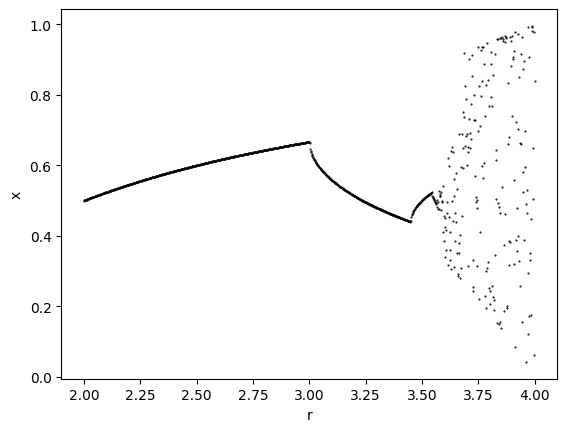

In [209]:
# logistic map
def logistic_map(r, x):
    return r * x * (1 - x)

r = np.linspace(2, 4, 1001)
x = 0.5
n = 1000

for ri in r:
    for _ in range(n):
        x = logistic_map(ri, x)

    plt.plot(ri, x, 'k.', markersize=1)

plt.xlabel('r')
plt.ylabel('x')
plt.show()


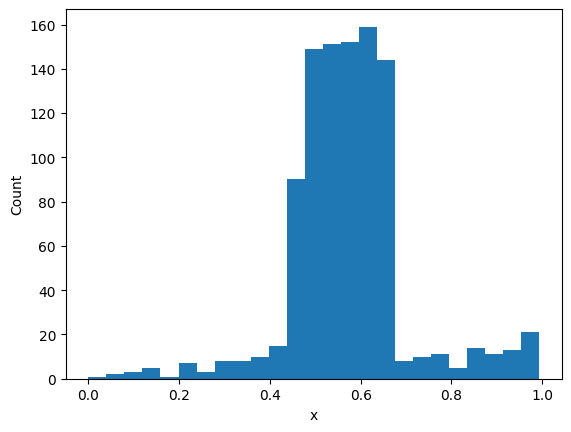

In [216]:
class Logistic:
    def __init__(self, seed):
        self.seed = seed

    def logistic_map(self, r, x):
        return r * x * (1 - x)

    def generate_sequence(self, r, x, n):
        for _ in range(n):
            x = self.logistic_map(r, x)
        return x

    def generate_sequence_for_r(self, r, x, n):
        return [self.generate_sequence(ri, x, n) for ri in r]

    def plot(self, r, x, n):
        x = self.generate_sequence_for_r(r, x, n)
        plt.plot(r, x, 'k.', markersize=1)
        plt.xlabel('r')
        plt.ylabel('x')
        plt.show()

logistic = Logistic(0.5)
plt.hist(logistic.generate_sequence_for_r(r, 0.5, 1000), bins=25)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

An interesting pathological case arises when using a modulus of $m=2^{31}$, a multiplier of $a=65539$ and an increment of $c=0$.  Generate a large sequence using this method, normalize them to the range [0,1] and produce a 3D plot in which three consecutive numbers are interpreted as a point in 3D space.  What kind of structure emerges?  Comment on whether this is bad or not.  Repeat this experiment with numpy's builtin random number generator and describe whether you see the same issue.  

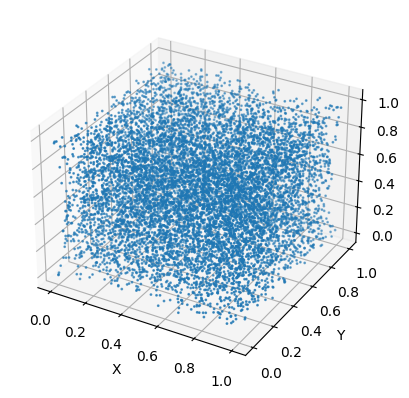

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Seed value
seed = 5

# Modulus parameter
m = 2**31

# Multiplier term
a = 65539

# Increment term
c = 0

# Number of Random numbers
# to be generated

num_randoms = 10000

results_randoms = [0] * (num_randoms)

linear_congruential_method(seed, m, a, c,
						results_randoms, 
						num_randoms)

# scale to [0,1]
results_randoms = np.array(results_randoms)/m

# plot in 3d space in which 3 consecutive random numbers are used as x, y, z coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_randoms[:-2], results_randoms[1:-1], results_randoms[2:], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()